# Лабораторная работа 2

## Линейная регрессия

В данной лабораторной работе вам могут быть полезны следующие материалы:

https://education.yandex.ru/handbook/ml

https://github.com/esokolov/ml-course-hse

### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна (отсюда название "метод наименьших квадратов");
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).
На лекциях было показано, что в этом случае проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$ записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:
$$S = a_1H + a_2W + a_3L + a_4N + a_5.$$
Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_1, a_2, a_3, a_4, a_5$, для которых отклонение правой части от наблюдаемых было бы наименьшим:
$$\sum_{i=1}^n\left(S_i - ( a_1H_i + a_2W_i + a_3L_i + a_4N_i + a_5)\right)^2 \longrightarrow \min$$
И сразу видно, что мы получили задачу на метод наименьших квадратов! А именно, у нас
$$X =
\begin{pmatrix}
H_1 & W_1 & L_1 & N_1 & 1\\
H_2 & W_2 & L_2 & N_2 & 1\\
\dots & \dots & \dots & \dots & \dots \\
H_n & W_n & L_n & N_n & 1
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}$$

Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k.$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени — это зависит от задачи). Подставим эти данные в предыдущее равенство:
$$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} =
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$$
(здесь $x_{ij}$ — это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} =
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест

После того как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2.$$

В целом хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна библиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

При выполнении этой лабораторной вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

### Задание 1. Метод наименьших квадратов (3 балла)

Скачайте файлы ``train.txt`` и ``test.txt``. В первом из них находится обучающая выборка, а во втором — тестовая. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — $n$ точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Ваша задача — по обучающей выборке подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (не забудьте ввести правильный путь!).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.linalg as sla

data_train = np.loadtxt('/content/train.txt', delimiter=',')
data_test = np.loadtxt('/content/test.txt', delimiter=',')

**0. [0 баллов]** Разделим значения $x$ и $y$:

In [3]:
x_train = data_train[:,0]
y_train = data_train[:,1]
x_test = data_test[:, 0]
y_test = data_test[:, 1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**1. [0.1 балла]** Найдите с помощью метода наименьших квадратов линейную функцию ($y = kx + b$), наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

In [6]:
a_n = np.ones((len(x_train), 1))
X = np.concatenate((x_train.reshape(-1, 1), a_n), axis=1)
a = np.linalg.inv(X.T @ X) @ X.T @ y_train
k = a[0]
b = a[1]
print(f"{k:.4f}x + {b:.4f}")

2.2791x + 4.4332


**2. [0.15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

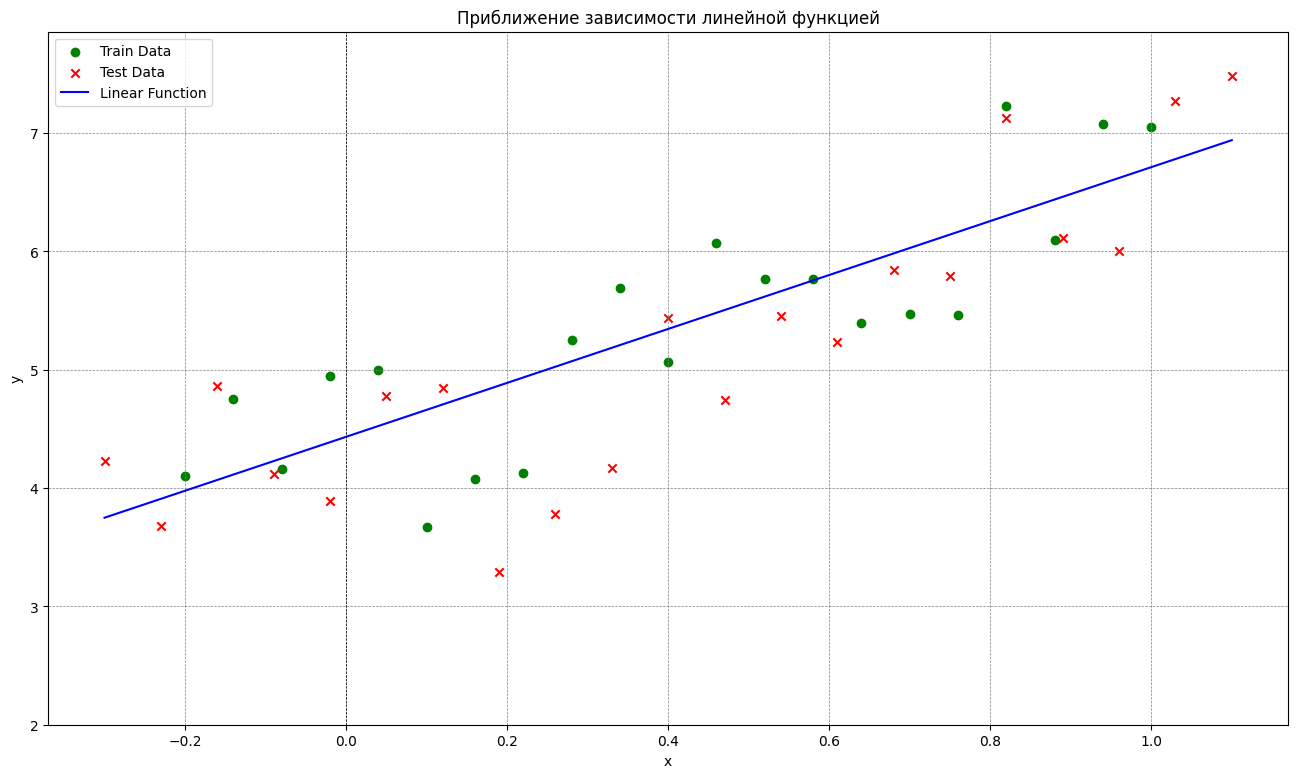

In [7]:
x_values = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()))
y_values = k * x_values + b

plt.figure(figsize=(16, 9))

plt.scatter(x_train, y_train, color='green', label='Train Data', marker='o')

plt.scatter(x_test, y_test, color='red', label='Test Data', marker='x')

plt.plot(x_values, y_values, color='blue', label='Linear Function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Приближение зависимости линейной функцией')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.ylim(bottom=2)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

**3. [0.15 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и напечатайте его в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [8]:
X = np.vander(x_train, 21, increasing=True)
a = np.linalg.solve(X.T @ X, X.T @ y_train)
res = f"{a[0]:.4f}"
for i in range(1, 21):
    j = a[i]
    if j > 0:
        res += f" + {j:.4f}"
    else:
        res += f" - {-j:.4f}"
    if i == 1:
        res += "x"
    elif i > 1:
        res += f"x^{i}"
print(res)

5.0993 + 3.8804x - 218.1244x^2 - 518.4151x^3 + 14705.1303x^4 - 8357.4568x^5 - 343804.2339x^6 + 959873.9964x^7 + 1639051.2351x^8 - 11786900.5310x^9 + 20128445.4138x^10 - 9123310.8854x^11 - 8629736.6226x^12 + 2907986.6138x^13 + 13449357.2917x^14 - 11839780.4444x^15 + 2507737.8397x^16 + 3449965.4315x^17 - 9852020.3030x^18 + 9560698.7477x^19 - 3033176.6112x^20


**4. [0.1 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок.

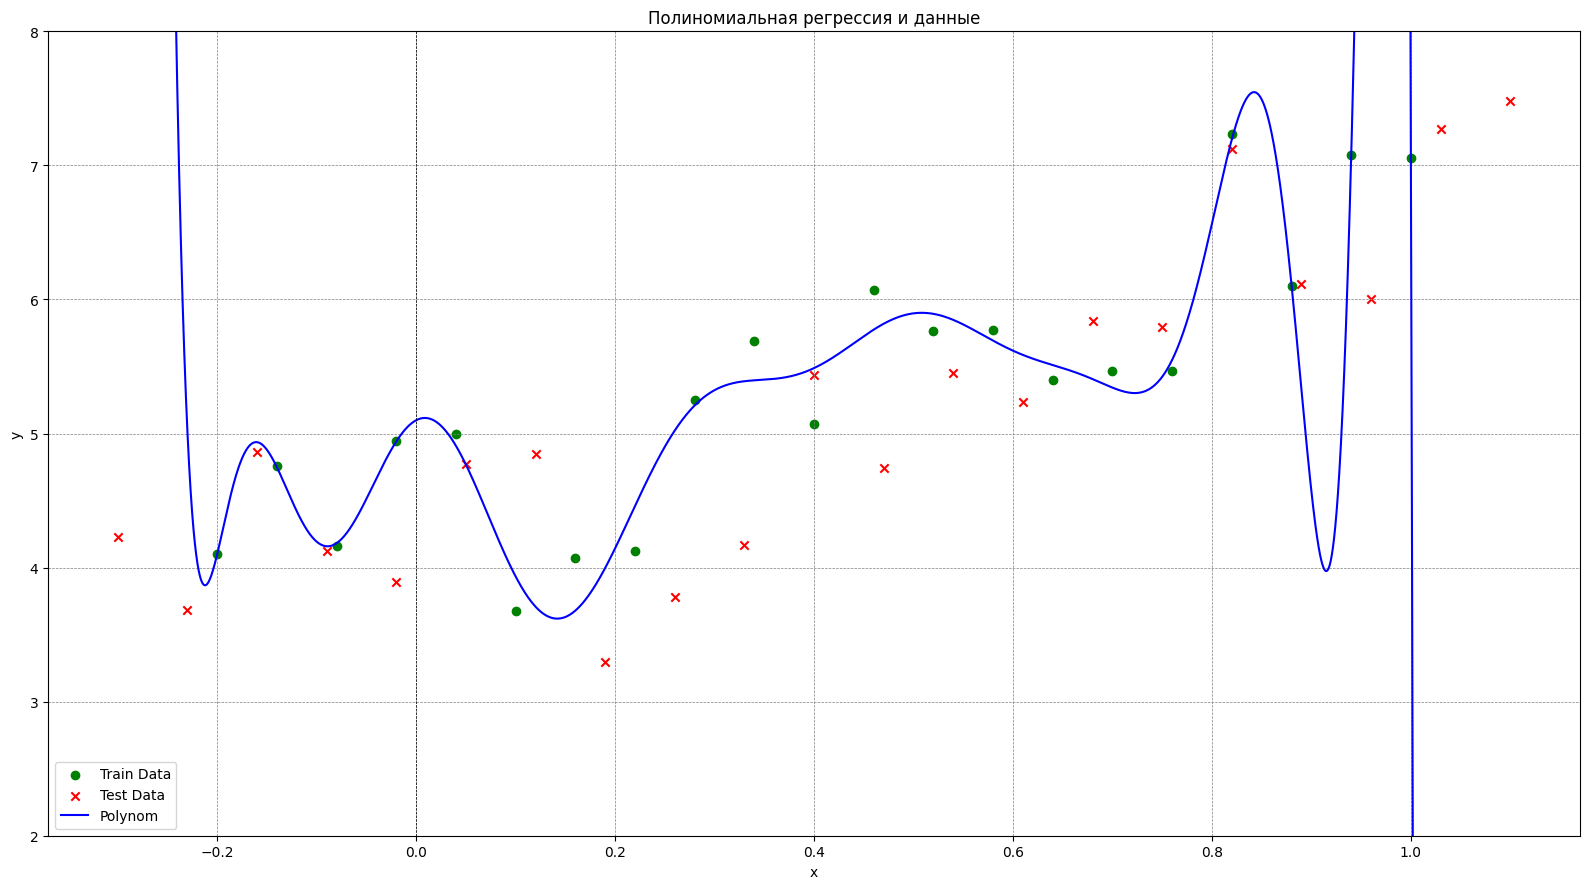

In [9]:
x_values = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 10000)
y_values = sum(a[i] * x_values**i for i in range(21))

plt.figure(figsize=(16, 9))

plt.scatter(x_train, y_train, color='green', label='Train Data', marker='o')
plt.scatter(x_test, y_test, color='red', label='Test Data', marker='x')

plt.plot(x_values, y_values, color='blue', label='Polynom')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия и данные')

plt.ylim(bottom=2)
plt.ylim(top=8)

plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**5. [0.25 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Напечатайте найденные многочлены в виде $a_0 + a_1 x + \ldots a_k x^k$.

In [10]:
for i in range(1, 11):
    X = np.vander(x_train, i + 1, increasing=True)
    a = np.linalg.solve(X.T @ X, X.T @ y_train)
    res = f"{a[0]:.4f}"
    for j in range(1, i + 1):
        k = a[j]
        if k > 0:
            res += f" + {k:.4f}"
        else:
            res += f" - {-k:.4f}"
        if j == 1:
            res += "x"
        elif j > 1:
            res += f"x^{j}"
    print(res)

4.4332 + 2.2791x
4.4725 + 1.1578x + 1.4016x^2
4.4607 + 1.0650x + 1.8598x^2 - 0.3818x^3
4.3412 + 1.1718x + 6.7941x^2 - 13.0513x^3 + 7.9185x^4
4.4313 - 0.1306x + 3.2747x^2 + 21.3748x^3 - 51.1315x^4 + 29.5250x^5
4.3838 - 4.5972x + 16.0029x^2 + 121.2571x^3 - 481.5101x^4 + 581.4533x^5 - 229.9701x^6
4.4445 - 4.0089x + 7.2155x^2 + 119.3508x^3 - 314.2312x^4 + 122.8782x^5 + 238.6994x^6 - 167.3820x^7
4.6638 - 5.1828x - 26.6956x^2 + 268.8604x^3 + 109.8957x^4 - 3132.8565x^5 + 6760.6286x^6 - 5701.7103x^7 + 1729.4776x^8
4.6459 - 4.5527x - 24.2627x^2 + 219.0420x^3 + 176.2454x^4 - 2441.9628x^5 + 3913.2685x^6 - 1216.4488x^7 - 1522.0978x^8 + 903.2154x^9
4.6692 - 2.1598x - 36.1754x^2 + 44.9354x^3 + 1201.9533x^4 - 1660.8234x^5 - 12969.9436x^6 + 46686.6786x^7 - 63621.0330x^8 + 40177.5536x^9 - 9818.5839x^10


**6. [1 балл]** Для каждого из них найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$ (в первом случае сумма ведётся по парам $(x_i, y_i)$ из обучающих данных, а во втором — по парам из тестовых данных).

In [11]:
for i in range(1, 11):
    X_train = np.vander(x_train, i + 1, increasing=True)
    a = np.linalg.solve(X_train.T @ X_train, X_train.T @ y_train)
    Y_train = X_train @ a
    mse_train = np.mean((Y_train - y_train)**2)
    X_test = np.vander(x_test, i + 1, increasing=True)
    Y_test = X_test @ a
    mse_test = np.mean((Y_test - y_test)**2)
    print(f"{mse_train:.4f} {mse_test:.4f}")

0.2969 0.4351
0.2697 0.3565
0.2695 0.3553
0.2611 0.4417
0.2500 0.5580
0.1883 2.5817
0.1854 2.5158
0.1591 4.3573
0.1585 4.7763
0.1532 14.6325


**7. [0.75 балла]** Для $k = 1,2,3,4,5,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

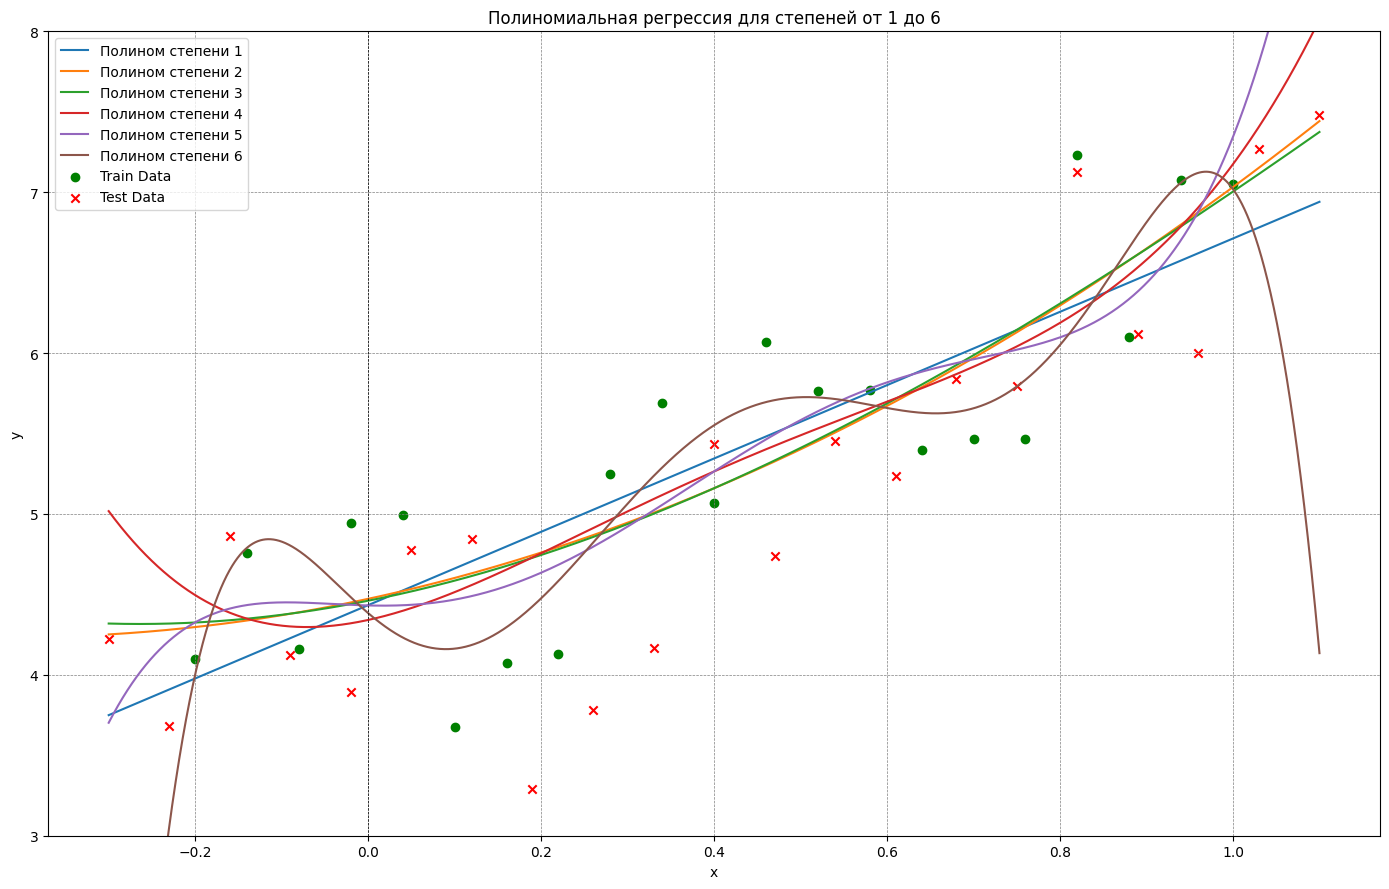

In [12]:
plt.figure(figsize=(14, 9))
for i in range(1, 7):
    X = np.vander(x_train, i + 1, increasing=True)
    a = np.linalg.solve(X.T @ X, X.T @ y_train)
    x_values = np.linspace(min(x_train.min(), x_test.min()), max(x_train.max(), x_test.max()), 10000)
    y_values = sum(a[j] * x_values**j for j in range(i + 1))
    plt.plot(x_values, y_values, label=f'Полином степени {i}')

plt.scatter(x_train, y_train, color='green', label='Train Data', marker='o')
plt.scatter(x_test, y_test, color='red', label='Test Data', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная регрессия для степеней от 1 до 6')

plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.ylim(bottom=3)
plt.ylim(top=8)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

**8. [0.5 балла]** Что происходит с ошибкой при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как, по вашему мнению, в машинном обучении называется наблюдаемый вами эффект?

Заметим, что при росте степени многочлена ошибка на тренировочных данных монотонно уменьшается: $0.2969 \rightarrow 0.1532$, то есть уменьшилась почти в 2 раза. Это подтверждает: чем сложнее модель, тем лучше она приближает тренировочные данные.\
Но с тестовыми данными все гораздо хуже: до $k = 3$ ошибка уменьшается, но потом начинает резко расти: при $k = 3: MSE = 0.3553$(минимальная $MSE$), а при $k = 10: MSE = 14.6318$(максимальная $MSE$). То есть при $k = 10$ ошибка примерно в 41 раз выше, чем минимальная.\
Казалось бы, более сложный многочлен должен давать лучшие результаты, но после $k = 3$ модель начинает "вызубривать" обучающие данные:буквально проходит через каждую точку обучающей выборки.
Это похоже на механическую зубрежку без понимания:
как если бы мы запомнили все ответы из учебника, но не смогли решить новую задачу.\
Поэтому мы и можем наблюдать такую тенденцию: на тренировочных данных ошибка почти нулевая (модель все "вызубрила"), а на тестовых данных ошибки катастрофические.\
Этот эффект в машинном обучении называется переобучением.


### Задание 2. Линейная регрессия (3.5 балла)

Скачайте файлы ``flats_moscow_mod.txt`` и ``flats_moscow_description.txt``. В первом из них содержатся данные о квартирах в Москве. Каждая строка содержит шесть характеристик некоторой квартиры, разделённые знаками табуляции; в первой строке записаны кодовые названия характеристик. Во втором файле приведены краткие описания признаков.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию `sklearn.model_selection.train_test_split` с параметром `test_size=0.3`. Не забудьте зафиксировать параметр `random_state`.

In [14]:
data = np.loadtxt('/content/flats_moscow_mod.txt', delimiter='\t', skiprows=1)
train_data, test_data = sklearn.model_selection.train_test_split(data, test_size=0.3, random_state=42)
X_train = train_data[:,1:]
y_train = train_data[:,0]
X_test = test_data[:,1:]
y_test = test_data[:,0]


**1. [0.5 балла]** Вашей задачей будет построить с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и остальными доступными параметрами. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [15]:
names = ["totsp", "livesp", "kitsp", "dist", "metrdist"]
X = np.column_stack([np.ones(X_train.shape[0]), X_train])
coeffs = np.linalg.inv(X.T @ X) @ (X.T @ y_train)
coeffs = coeffs.flatten()
equation = f"price = {coeffs[0]:.3f}"

for i in range(1, len(coeffs)):
    sign = " - " if coeffs[i] < 0 else " + "
    abs_coeff = abs(coeffs[i])
    equation += f"{sign}{abs_coeff:.3f}*{names[i-1]}"

print(equation)

price = -8.101 + 1.595*totsp + 1.060*livesp + 2.069*kitsp - 3.412*dist - 1.386*metrdist


**2. [0.25 балла]** Какой смысл имеют их знаки? Согласуются ли они с вашими представлениями о жизни?

Знаки показывают, как параметр влияет на цену квартиры: если коэффициент $> 0$, то параметр положительно влияет на цену, если коэффициент $< 0$, то, соответственно, отрицательно.\
Знаки в полученной формуле соответсвуют моим представлениям о жизни:\
По моим представлениям на стоимость квартиры положительно влияют общая площадь(totsp), жилая площадь(livesp) и площадь кухни(kitsp), что и отражено в полученной формуле\
Также очевидно, что чем дальше находится квартира от центра города(dist) или метро(metrdist), тем цена ниже. Это также отражено в полученной формуле.

**3. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [16]:
X_test1 = np.column_stack([np.ones(X_test.shape[0]), X_test])
y_pred = X_test1 @ coeffs
mse = np.mean((y_pred - y_test)**2)
print(f"MSE на тестовой выборке: {mse:.3f}")

MSE на тестовой выборке: 1226.781


### Усложнение модели

Конечно, никто не гарантирует, что объясняемая переменная (цена квартиры) зависит от остальных характеристик именно линейно. Зависимость может быть, например, квадратичной или логарифмической; больше того, могут быть важны не только отдельные признаки, но и их комбинации. Это можно учитывать, добавляя в качестве дополнительных признаков разные функции от уже имеющихся характеристик: их квадраты, логарифмы, попарные произведения.

В этом задании вам нужно постараться улучшить качество модели, добавляя дополнительные признаки, являющиеся функциями от уже имеющихся. Но будьте осторожны: чрезмерное усложнение модели будет приводить к переобучению.

**4. [0.25 балла]** Опишите признаки, которые вы решили добавить. Объясните, чем был мотивирован выбор именно этих признаков.

Добавленные признаки: \
1. Логарифм от общей площади. Объяснение: Для маленьких квартир площадь сильнее влияет на цену, чем для больших. \
2. Логарифм от расстояния до центра. Объяснение: квартиры, которые находятся в 10 км от центра и 11 км от центра не сильно различаются по цене при прочих равных параметрах, но при этом если сравнивать квартиры в центре и 1 км от центра, то этот километр способен уже существенно повлиять на цену. \
3. Отношение жилой площади к общей площади. Объяснение: для многих людей важно, чтобы жилой площади было немало, то есть чтобы балкон, допустим, не занимал половину площади квартиры. \
4. Отношение площади кухни к общей площади. Для многих важно, чтобы кухня была не слишком маленькая по сравнению с остальной площадью.\
5. Четвертая степень от жилой площади. Объяснение: увеличение жилой площади и площади кухни должны по разному влиять на цену. Человеку хочется иметь много пространства, где жить, это ассоциируется с роскошью. В свою очередь, кухня имеет более практичное значение. Поэтому жилая площадь должна положительно влиять на цену сильнее , чем площадь кухни.

**5. [2 балла]** Постройте с помощью метода наименьших квадратов (линейную) зависимость между ценой квартиры и новыми признаками. С помощью известных вам формул найдите регрессионные коэффициенты. Выпишите построенную модель.

In [17]:
names = ["totsp", "livesp", "kitsp", "dist", "metrdist","log_totsp", "log_dist", "livesp/totsp", "kitsp/totsp", "sqrt_livesp"]
X = np.column_stack([
    np.ones(X_train.shape[0]),
    X_train,
    np.log1p(X_train[:, 0]),
    np.log1p(X_train[:, 3]),
    X_train[:, 1] / X_train[:, 0],
    X_train[:, 2] / X_train[:, 0],
    X_train[:, 1] *X_train[:, 1]*X_train[:, 1]*X_train[:, 1]
])
coeffs = np.linalg.inv(X.T @ X) @ (X.T @ y_train)
coeffs = coeffs.flatten()
equation = f"price = {coeffs[0]:.3f}"

for i in range(1, len(coeffs)):
    sign = " - " if coeffs[i] < 0 else " + "
    abs_coeff = abs(coeffs[i])
    equation += f"{sign}{abs_coeff:.3f}*{names[i-1]}"

print(equation)

price = -898.402 + 0.962*totsp - 6.544*livesp + 1.556*kitsp - 3.136*dist - 1.208*metrdist + 246.652*log_totsp - 3.666*log_dist + 310.296*livesp/totsp + 57.748*kitsp/totsp + 0.000*sqrt_livesp


**6. [0.25 балла]** Оцените качество приближения, вычислив среднеквадратическую ошибку на тестовой выборке.

In [18]:
X_test2 = np.column_stack([np.ones(X_test.shape[0]),
    X_test,
    np.log1p(X_test[:, 0]),
    np.log1p(X_test[:, 3]),
    X_test[:, 1] / X_test[:, 0],
    X_test[:, 2] / X_test[:, 0],
    X_test[:, 1] * X_test[:, 1]*X_test[:, 1]*X_test[:, 1]
])
y_pred = X_test2 @ coeffs
mse = np.mean((y_pred - y_test)**2)
print(f"MSE при новых параметрах: {mse:.3f}")

MSE при новых параметрах: 806.242


### Задание 3. Регуляризация (3.5 балла)

Вспомним, что задача линейной регрессии формулируется как задача нахождения проекции вектора значений объясняемой переменной $y$ на линейную оболочку $\langle x_1,\ldots,x_k\rangle$ векторов значений регрессоров. Если векторы $x_1,\ldots,x_k$ линейно зависимы, то матрица $X^TX$ вырожденна и задача не будет решаться с помощью приведённой выше формулы. В жизни, по счастью, различные признаки редко бывают *в точности* линейно зависимы, однако во многих ситуациях они скоррелированы и становятся "почти" линейно зависимыми. Таковы, к примеру, зарплата человека, его уровень образования, цена машины и суммарная площадь недвижимости, которой он владеет. В этом случае матрица $X^TX$ будет близка к вырожденной, и это приводит к численной неустойчивости и плохому качеству решений; как следствие, будет иметь место переобучение. Один из симптомов этой проблемы — необычно большие по модулю компоненты вектора $a$.

Есть много способов борьбы с этим злом. Один из них — регуляризация. Сейчас мы рассмотрим одну из её разновидностей — **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ — некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**1. [0.25 балла]** Почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Если подбирать коэффициент регуляризации $\lambda$ по обучающей выборке, модель может "подстроиться" под шум или особенности именно этой выборки, что приведёт к переобучению. Регуляризация предназначена для улучшения обобщающей способности модели, но если
$\lambda$ выбирать на тех же данных, на которых обучается модель, это противоречит основной идее регуляризации.\
Тестовая выборка должна имитировать "реальные данные", которые модель никогда не видела. Если использовать её для подбора
$\lambda$, информация о тестовой выборке косвенно влияет на настройку модели, что приводит к оптимистичной оценке качества и снижает надёжность итоговых результатов.・ﾟ

**2. [0 баллов]** Теперь давайте вспомним первую задачу. Если вы её сделали, то помните, что ошибка аппроксимации многочленом шестой степени довольно высокая. Попытаемся использовать регуляризацию при построении модели. Поделите обучающую выборку из первой задачи на две части, одну из которых объявите обучающей, а другую — валидационной (будьте осторожны при выборе `train_size`, в этой выборке не так много данных).

In [20]:
data_train = np.loadtxt('/content/train.txt', delimiter=',')
data_test = np.loadtxt('/content/test.txt', delimiter=',')
data_train, data_validation=sklearn.model_selection.train_test_split(data_train, train_size=0.65, random_state=42)
X_train = data_train[:,0]
y_train = data_train[:,1]
X_test = data_test[:,0]
y_test = data_test[:,1]
X_val=data_validation[:,0]
y_val=data_validation[:,1]

**3. [0.75 балла]** Убедитесь, что, используя регуляризацию с хорошо подобранным коэффициентом $\lambda$, ошибку на тестовой выборке можно сделать не больше, чем для многочлена оптимальной степени в модели без регуляризации.

In [21]:
l_res=0
n=len(X_train)
m=len(X_val)
k=len(X_test)
E=np.eye(7)
X = np.hstack([X_train.reshape((n,1))**j for j in range(7)])
Y = np.hstack([X_val.reshape((m,1))**j for j in range(7)])
Z = np.hstack([X_test.reshape((k,1))**j for j in range(7)])
a=sla.inv(X.T@X)@X.T@y_train
m_res=sla.norm(Y@a-y_val)**2/m
l_grid=np.logspace(0, 10, 1000)
for l in l_grid:
  a_l=sla.inv(X.T@X+l*E)@X.T@y_train
  m_l=sla.norm(Y@a_l-y_val)**2/m
  if (m_l<m_res):
    m_res=m_l
    l_res=l
a_res=sla.inv(X.T@X+l_res*E)@X.T@y_train
ans=sla.norm(Z@a_res-y_test)**2/k
print(f'mse (на тестовой выборке)={ans}')
print(f'det(X^TX)={sla.det(X.T@X)}')
print(f'det(X^TX+lambda*E)={sla.det(X.T@X+l*E)}')


mse (на тестовой выборке)=0.33740385797572586
det(X^TX)=5.533540827905251e-15
det(X^TX+lambda*E)=1.0000000028960793e+70


было 0.35, получилось!

**4. [0.25 балла]** Для этого $\lambda$ сравните $\det(X^TX)$ и $\det(X^TX + \lambda E)$. Теоретически объясните полученный результат, доказав, что $\det(X^TX+\lambda E) > 0$ при $\lambda>0$.

Для данного $λ$ $\det X^TX+λE≈ 10^{70}>5.5*10^{-15}≈\det(X^TX)$

Пусть $X= (x_1 \; x_2 \; \dots \; x_k)=\begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1k}\\
x_{21} & x_{22} & \dots & x_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \dots & x_{nk}\\
\end{pmatrix}$. Тогда $X^TX$ - матрица Грама (для стандартного скалярного произведения) системы $(x_1 \; x_2 \; \dots \; x_n)$. Построим матрицу $X'=(x_1' \; x_2' \; \dots \; x_k')=\begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1k}\\
x_{21} & x_{22} & \dots & x_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \dots & x_{nk}\\
\sqrt{\lambda} & 0 & \dots & 0\\
0 & \sqrt{\lambda} & \dots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & \sqrt{\lambda}\\
\end{pmatrix}$. Заметим, что система $(x_1' \; x_2' \; \dots \; x_n')$ линейно независима и тогда определитель её матрицы Грама $G'$ положителен. Заметим также, что $(x_i',x_j')=\begin{cases}
(x_i,x_j); i\ne j\\
(x_i,x_j)+\lambda; i=j
\end{cases}$.

 Тогда $G'=\begin{pmatrix}
(x_1',x_1') & (x_1', x_2') & \dots & (x_1', x_n')\\
(x_2',x_1') & (x_2', x_2') & \dots & (x_2', x_n')\\
\vdots & \vdots & \ddots & \vdots\\
(x_n',x_1') & (x_n', x_2') & \dots & (x_n', x_n')\\
\end{pmatrix}=\begin{pmatrix}
(x_1,x_1) +\lambda & (x_1, x_2) & \dots & (x_1, x_n)\\
(x_2,x_1) & (x_2, x_2) +\lambda & \dots & (x_2, x_n)\\
\vdots & \vdots & \ddots & \vdots\\
(x_n,x_1) & (x_n, x_2) & \dots & (x_n, x_n)+\lambda\\
\end{pmatrix}=X^TX+\lambda E
$.

Так как $\det G'>0$, $\det X^TX+\lambda E>0$

**5. [0.25 балла]** Нарисуйте на одном чертеже графики многочленов шестой степени, приближающих неизвестную функцию, для модели с регуляризацией и без.

**6. [0.25 балла]** Чем первый из них выгодно отличается от второго?

Многочлен с регуляризацией устроен более просто (монотонен в рассматриваемой области) по сравнению с многочленом без регуляризации. Поэтому он лучше описывает зависимость (судя по графику, изначальная $f(x)$ устроена не очень сложно). Кроме того, многочлен с регуляризаией, судя по графику, менее подстроен под случайный шум.

**7. [0.75 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$ ($k \leqslant n$), $y \in \mathbb{R}^n$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k$. Решите теоретически следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$
(То есть найдите все векторы $a \in \mathbb{R}^k$, для которых выражение слева принимает наименьшее возможное значение.) В частности, докажите существование решений и укажите их количество в зависимости от входных данных.

При $λ=0$ задача оптимизации - минимизация $|Xa-y|^2$ и тогда $a=(X^TX)^{-1}y$ (так как $rk X=k$, столбцы $X$ линейно независимы, далее пользуемся доказанным на лекциях). Рассмотрим $λ>0$:

Построим матрицу $X'$ тем же образом: $X'=\begin{pmatrix}X\\
\sqrt{λ}E
\end{pmatrix}=\begin{pmatrix}
x_{11} & x_{12} & \dots & x_{1k}\\
x_{21} & x_{22} & \dots & x_{2k}\\
\vdots & \vdots & \ddots & \vdots\\
x_{n1} & x_{n2} & \dots & x_{nk}\\
\sqrt{\lambda} & 0 & \dots & 0\\
0 & \sqrt{\lambda} & \dots & 0\\
\vdots & \vdots & \ddots & \vdots\\
0 & 0 & \dots & \sqrt{\lambda}\\
\end{pmatrix}$

Пусть $Xa=b$. Заметим, что $X'a=\begin{pmatrix}
b_1\\
\vdots\\
b_n\\
\sqrt{λ}a_1\\
\vdots\\
\sqrt{λ}a_k
\end{pmatrix}\in \mathbb{R}^{n+k}$. Пусть $y'=\begin{pmatrix}
y_1\\
\vdots\\
y_n\\
0\\
\vdots\\
0
\end{pmatrix}\in\mathbb{R}^{n+k}$ Тогда $X'a-y'=\begin{pmatrix}
b_1-y_1\\
\vdots\\
b_n-y_n\\
\sqrt{λ}a_1\\
\vdots\\
\sqrt{λ}a_k
\end{pmatrix}$, соответственно $|X'a-y'|^2=\sum_{i=1}^{n+k}[X'a-y']_i^2=\sum_{i=1}^n(b_i-y_i)^2+\sum_{i=n+1}^{n+k}(\sqrt{λ}a_{i-n})^2=\sum_{i=1}^n([Xa]_i-y_i)^2+\sum_{i=1}^kλa_i^2=\sum_{i=1}^n[Xa-y]_i^2+λ\sum_{i=1}^ka_i^2=|Xa-y|^2+λ|a|^2$.

Тогда $|Xa-y|^2+λ|a|^2\to\min \Leftrightarrow |X'a-y'|^2\to \min$.

По доказанному ранее $(X')^TX'=X^TX+λE$ и так как $\lambda>0$, $\det (X')^TX'=\det (X^TX+λE)>0$. Тогда $a=(((X')^T)X')^{-1}(X')^Ty'$ - единственное решение данной оптимизационной задачи.

При этом $(X')^TX'=X^TX+λE$.

Так как $X'\in Mat_{(n+k)\times k}\implies (X')^T\in Mat_{k\times(n+k)}, y'\in\mathbb{R}^{n+k}$, $(X')^Ty'\in\mathbb{R}^k$ и $[(X')^Ty']_i=\sum_{j=1}^{n+k}[(X')^T]_{ij}y'_i=\sum_{j=1}^{n+k}[X']_{ji}y'_i=\sum_{j=1}^{n}[X']_{ji}y'_i+\sum_{j=1}^{k}[X']_{ji}y'_i=\sum_{j=1}^{n}X_{ji}y_i+\sum_{j=1}^k[X']_{ji}*0=\sum_{j=1}^{n}X_{ji}y_i=\sum_{j=1}^{n}X^T_{ij}y_i=[X^Ty]_i$

,имеем $(X')^Ty'=X^Ty$

Итого, при $λ>0$ $a=(((X')^T)X')^{-1}X'y'=(X^TX+λE)^{-1}X^Ty$ - единственное решение.

Интуитивно это можно понимать так: мы ищем компромисс между минимизацией длины разности $|Xa - y|$ (то есть точностью решения задачи регрессии) и тем, чтобы компоненты вектора $a$ не становились слишком большими по модулю.

**8. [0.25 балла]** Попробуйте объяснить, почему регуляризовать (штрафовать за слишком большую абсолютную величину) коэффициент при константном признаке (который состоит из одних единиц) — плохая идея.

Построение модели по константному признаку - попытка предсказать результат, не основываясь на данных об объекте (константный признак не сообщает информации об объекте). Тогда лучшее решение - каждый раз называть среднее по имеющимся данным. Применение регуляризации в данном случае уменьшит возвращаемый моделью результат (отдалит его от среднего), так как в данном случае большой коэффициент - следствие больших значений целевой величины в обучающих данных, а не переобученияﾟ

**9. [0.5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

При $λ>0$ знаем, что $\det (X')^TX'=\det X^TX+λE>0$ вне зависимости от $rk\; X$. Повторяя предыдущие рассуждения, $a=(X^TX+λE)^{-1}X^Ty$ - единственное решение.

При $λ=0$ оптимизационная задача - минимизация $|Xa-y|^2$.

Пусть СЛУ $Xa=y$ совместна (например, $X=(1, 0), y=(1)$). Тогда она точно имеет бесконечно множество решений ($rk X<k$ и $k$ - число неизвестных системы, далее пользуемся доказанным на лекциях). Каждое из них будет решением оптимизационной задачи: если $Xa_0=y$, то $|Xa_0-y|^2=0$ и так как величина $|Xa-y|^2$ неотрицательна, то достигается её наименьшее значение из возможных. Соответственно в таком случае решений оптимизационной задачи бесконечно много.

Пусть СЛУ $Xa=y$ несовместна
(например, $X=\begin{pmatrix}
1 & 0\\
0 & 0
\end{pmatrix}, y=\begin{pmatrix}
1\\
1
\end{pmatrix}$). Пусть $S=\langle X^{(1)}, \dots, X^{(k)}\rangle, c=pr_Sy$. Множество решений данной задачи - множество псевдорешений $Xa=y$. По доказанному на лекциях, множество псевдорешений $Xa=y$ - множество решений $Xa=c$. Система $Xa=c$ точно имеет решение, так как $c=pr_sy\in S$ по определению. При этом её решение не может быть единственно, так как $rkX<k$ и $k$ - число неизвестных. Значит у неё бесконечно много решений. Так как множество решений $Xa=c$ - множество решений оптимизационной задачи, у оптимизационной задачи бесконечно много решений.

Итого, у оптимизационной задачи бесконечно много решений при $λ=0$ и единственное решение при $λ>0$.

**10. [0.25 балла]** Покажите теоретически, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$. Почему большие веса в линейной модели — плохо?

Решений бесконечно много тогда и только тогда, когда $λ=0$.

В случае совместности $Xa=y$, множество решений оптимизационной задачи $L$ - множество решений $Xa=y$ (см. предыдущий пункт). Пусть $x_0$ - частное решение СЛУ (оно существует, так как СЛУ совместна). Тогда $L=x_0+S$, где $S$ - множество решений ОСЛУ $Xa=0$. У данной ОСЛУ есть ненулевое решение $y_0$, так как $rk X<k$, то есть столбцы $X$ линейно зависимы. Так как $Xy_0=0$, $X*(2y_0)=2Xy_0=0$, то есть $2y_0$ - тоже решение задачи. По индукции получаем, что $2^ny_0$ - решение задачи для всех $n\in \mathbb{N}$. То есть $x_0+2^ny_0\in L$ для всех $n\in \mathbb{N}$. Но $|(x_0+2^ny_0)_i|$ может быть сколь угодно большим при достаточно большом $n$. Значит, компоненты решения задачи могут быть сколь угодно большими по модулю.

В случае несовместности $Xa=y$, множество решений оптимизационной задачи $L$ - множество решений $Xa=c$ (см. предыдущий пункт). Пусть $x_0$ - частное решение СЛУ (оно существует, так как $c=pr_Sy\in S$). Тогда $L=x_0+S$, где $S$ - множество решений ОСЛУ $Xa=0$. У данной ОСЛУ есть ненулевое решение $y_0$, так как $rk X<k$, то есть столбцы $X$ линейно зависимы. Так как $Xy_0=0$, $X*(2y_0)=2Xy_0=0$, то есть $2y_0$ - тоже решение задачи. По индукции получаем, что $2^ny_0$ - решение задачи для всех $n\in \mathbb{N}$. То есть $x_0+2^ny_0\in L$ для всех $n\in \mathbb{N}$. Но $|(x_0+2^ny_0)_i|$ может быть сколь угодно большим при достаточно большом $n$. Значит, компоненты решения задачи могут быть сколь угодно большими по модулю

Большие веса в линейной модели означают, что даже при незначительном различии входных данных предсказания модели для них могут сильно различаться. Это плохо, так как зависимости из реальной жизни, как правило, себя так не ведут. Кроме того, большие веса означают высокую зависимость самого вектора $a$ от обучающей выборки. Это является явным симптомом переобучения модели.

### Задание 4. Онлайн-обучение линейной регрессии (3 балла)

Раньше мы работали в ситуации, когда объекты $x_i$ и значения $y_i$ даны с самого начала и всегда доступны. Допустим теперь, что пары $(x_i, y_i)$ поступают к нам по одной и мы не можем себе позволить хранить их все в памяти (это может быть актуально, например, если вы пытаетесь обучить модель на устройстве со сравнительно небольшим количеством оперативной памяти: скажем, на мобильном телефоне или на бортовом компьютере спутника связи). В этом случае нам нужно уметь решать следующую задачу:

**Известно:** решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$;

**На вход поступает:** новая пара $(x_{t+1}, y_{t+1})$;

**Требуется:** быстро (за время, не зависящее от $t$) отыскать решение задачи регрессии для расширенного датасета $(x_1, y_1),\ldots,(x_t,y_t),(x_{t+1}, y_{t+1})$.

Обозначим $X_{(t)} = (x_1\ldots x_t)^T$ и $y_{(t)} = (y_1,\ldots,y_t)^T$. Тогда, как мы хорошо помним, решение задачи регрессии для датасета $(x_1, y_1),\ldots,(x_t,y_t)$ имеет вид $\hat{a}_{(t)} = \left(X^T_{(t)}X_{(t)}\right)^{-1}X^T_{(t)}y_{(t)}$. Размеры матриц $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$ не зависят от $t$, поэтому их мы, пожалуй, можем себе позволить хранить в памяти.

**1. [1 балл]** И вот ваше первое задание в этом разделе: придумайте алгоритм, принимающий на вход матрицы $X^T_{(t)}X_{(t)}$ и $X^T_{(t)}y_{(t)}$, а также пару $(x_{t+1}, y_{t+1})$, и вычисляющий матрицы $X^T_{(t+1)}X_{(t+1)}$ и $X^T_{(t+1)}y_{(t+1)}$. Сложность вашего алгоритма не должна зависеть от $t$. Опишите ваш алгоритм теоретически и обоснуйте его сложность.

Сначала запишем исходные данные для датасета из $t$ точек: \
Матрица объектов: $X_{(t)} \in \mathbb{R}^{t \times k}$

Вектор значений: $y_{(t)} \in \mathbb{R}^t$ \\
$A_{(t)} = X_{(t)}^TX_{(t)} $ - размер $k \times k$

$b_{(t)} = X_{(t)}^Ty_{(t)}$ - размер $k \times 1$

Поступает новая пара $(x_{t+1}, y_{t+1}$, где $x_{t+1}$ - вектор-строка размера $1 \times k$, $y_{t+1}$ - скаляр

Обновленные матрицы: $X_{(t+1)} = \begin{pmatrix}
X_{(t)} \\ x_{t+1} \end{pmatrix}$, $y = \begin{pmatrix}
y_{(t)} \\ y_{t+1} \end{pmatrix}$

Рекуррентное обновление для $A_{(t+1)}:$

$A_{(t+1)} = X^T_{(t+1)}X_{(t+1)} = \begin{pmatrix} X^T_{(t)} & x^T_{t+1} \end{pmatrix} \begin{pmatrix} X_{(t)} \\
x_{t+1} \end{pmatrix} = X^T_{(t)}X_{(t)} + x_{t+1}^Tx_{t+1} $

Рекуррентное обновление для $b_{(t+1)}:$

$b_{(t+1)} = X^T_{(t+1)}y_{(t+1)} = \begin{pmatrix} X^T_{(t)} & x^T_{t+1} \end{pmatrix} \begin{pmatrix} y_{(t)} \\
y_{t+1} \end{pmatrix} = X^T_{(t)}y_{(t)} + x_{t+1}^Ty_{t+1}$

Решение обновленного датасета:

$a_{(t+1)} = A^{-1}_{(t+1)}b_{(t+1)}$

Сложность алгоритма:

1) Обновление матрицы $A:$

Умножение $X^T_{t+1}x_{t+1}: O(k^2)$, размер $X^T_{t+1}: k \times 1$, а размер $x_{t+1}:1 \times k$ и на выходе получается матрица $k \times k$
Сложение $X^T_{(t)}X_{(t)} + x_{t+1}^Tx_{t+1} : O(k)$, т.к. складываем кажду. ячейку первой матрицы с с соответствующей ячейкой второй матрицы а всего ячеек у каждой матрицы $k \times k$

2) Обновление вектора $b:$

Умножение $X^T_{t+1}y_{t+1}: O(k)$, т.к. в $X^T_{t+1}$ $k$ ячеек и каждую умножаем на скаляр

Сложение $ X^T_{(t)}y_{(t)} + x_{t+1}^Ty_{t+1}$ аналогично $O(k)$

3) Инверсия $A_{(t+1)}$

Обычно за $O(k^3)$

Видим, что нигде сложность не зависит от $t$

**2. [2 балла]** Теперь настало время написать немного кода и порисовать красивые картинки. Вам нужно будет реализовать симуляцию онлайн-обучения регрессии для задачи приближения функции (в данном случае $f_{true}(x) = 2x\sin(5x) + x^2 - 1$; все значения искажены небольшим нормальным шумом) многочленом степени не выше 5.

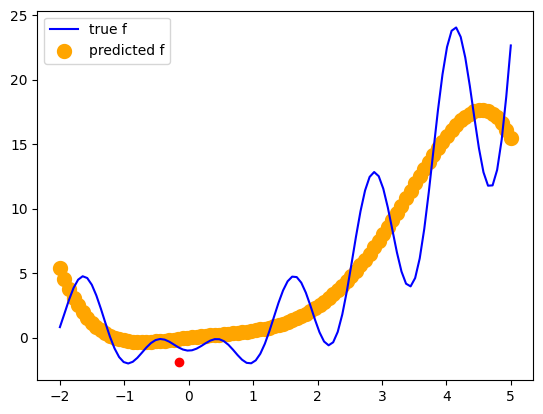

In [ ]:
from IPython.display import clear_output

f_true = lambda x: 2*x*np.sin(5*x) + x**2 - 1 # this is the true function

# We need this to make the plot of f_true:
x_grid = np.linspace(-2,5,100) # 100 linearly spaced numbers
x_grid_enl = np.hstack([x_grid.reshape((100,1))**j for j in range(6)])
y_grid = f_true(x_grid)


for i in range(200):

    x_new = np.random.uniform(-2, 5)
    y_new = f_true(x_new) + 2*np.random.randn()

    x_vec = np.array([[x_new**j for j in range(6)]])
    if i == 0:
        A = x_vec.T @ x_vec
        b = x_vec.T * y_new
    else:
        A += x_vec.T @ x_vec
        b += x_vec.T * y_new
    # the rest of the code is just bells and whistles
    if (i+1)%5==0:
        clear_output(True)
        plt.plot(x_grid,y_grid, color='blue', label='true f')
        plt.scatter(x_new, y_new, color='red')

        coeffs = np.linalg.solve(A, b)

        y_pred = x_grid_enl @ coeffs

        plt.scatter(x_grid, y_pred, color='orange', linewidth=5, label='predicted f')

        plt.legend(loc='upper left')
        plt.show()

### Добавление. QR-разложение

**QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ — верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычного полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.